In [1]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


from plot_helper import *

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

# Plots for ACC paper

In [6]:
mon_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']#['May']#
#folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information\ununiform-hour'
folder_path=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information\uniform-hour'
fn_list=[]
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)
mape,y_dic_0,mean_dic_0= get_df_for_plot("zero",fn_list)

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

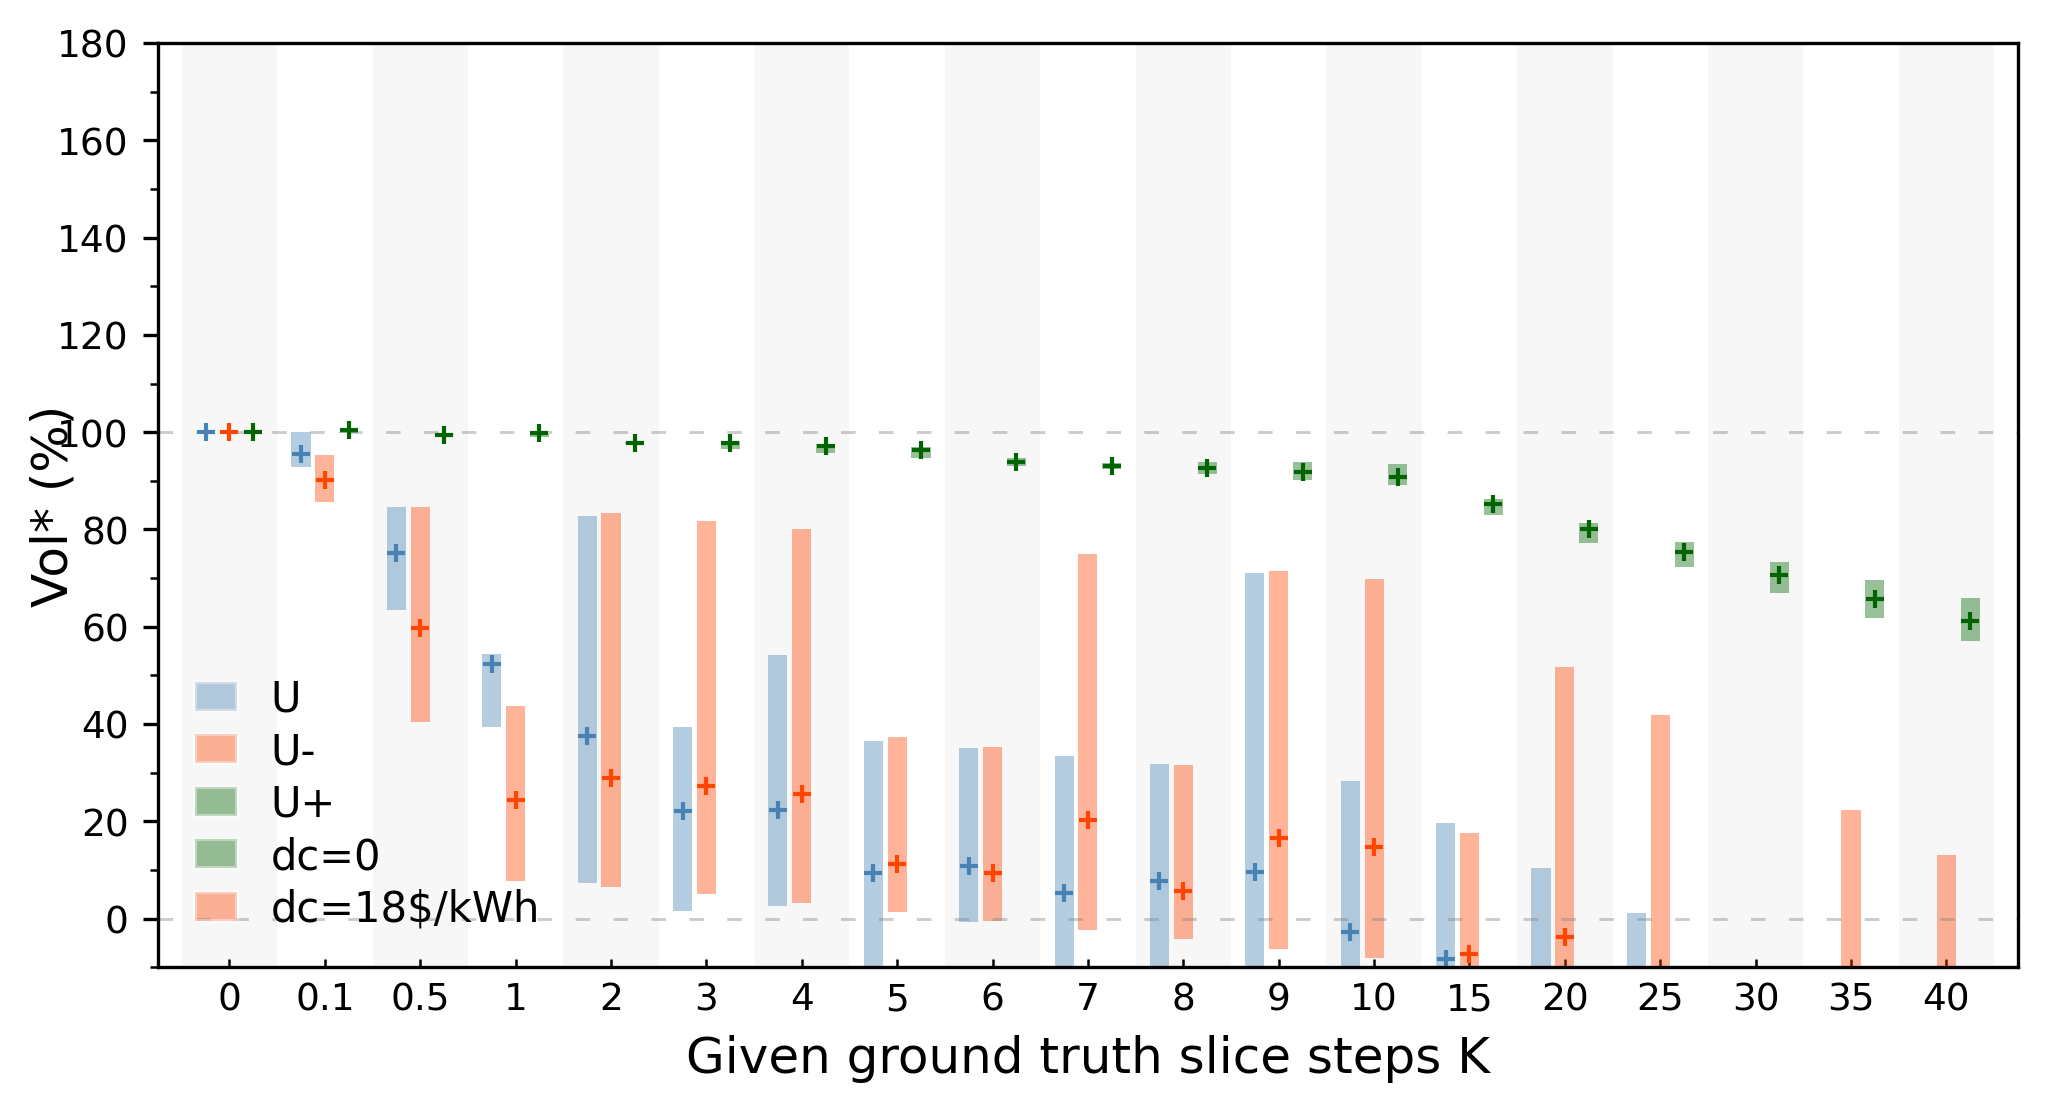

In [9]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,
    mape=mape,y_dic=y_dic_old,mean_dic=mean_dic_old,
    save_fn="fig3-value-of-info-track-real-may.png"
)

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

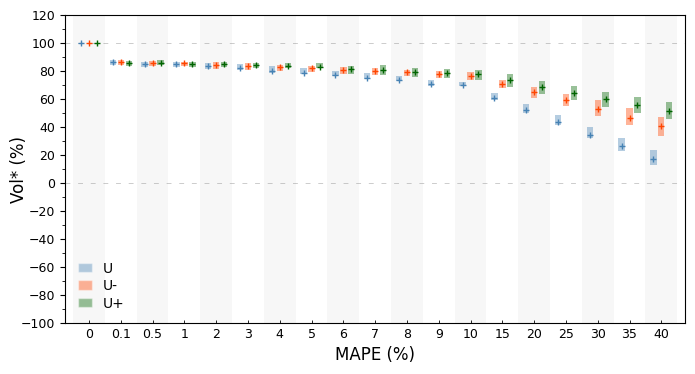

In [14]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,vol=True,
    mape=mape,y_dic=y_dic_0,mean_dic=mean_dic_0,
    save_fn="fig3-value-of-info-zero.png"
)

In [15]:
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)
mape,y_dic_0,mean_dic_0= get_df_for_plot("zero",fn_list)

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

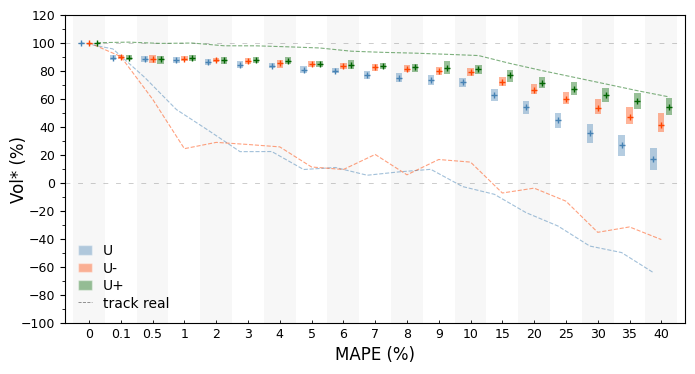

In [16]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,
    mape=mape,y_dic=y_dic,mean_dic=mean_dic,
    mean_dic_old=mean_dic_old,plot_line_old=True
)


In [17]:
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)
mape,y_dic_0,mean_dic_0= get_df_for_plot("zero",fn_list)

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

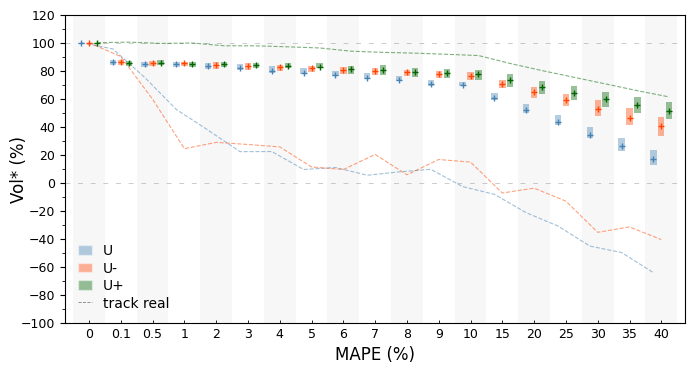

In [18]:
cluster_box_plot(
    figsize=(8,4),plot_line_new=False,
    mape=mape,y_dic=y_dic_0,mean_dic=mean_dic_0,
    mean_dic_old=mean_dic_old,plot_line_old=True
)


# Plots for Journal paper

# Plot value of information in the time scale

In [5]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK96\concatnate_search.xlsx'

In [21]:
def cal_relative_12mon(fn,drop_base,group_keys=['month_of_year']):
    df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    df_grouped=df.groupby(group_keys)
    df_to_concat=[]
    for i in df_grouped.groups.keys():
        df=df_grouped.get_group(i)
        lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
        upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
        diff=upper_bound-lower_bound
        df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
        if drop_base:
            df=df.drop(df[(df.pred_model=="GT")].index)
        df_to_concat.append(df)
    df=pd.concat(df_to_concat)
    return df
def get_df(fn,drop_base):
    concat_k96_dc=cal_relative_12mon(fn,drop_base)
    #concat_k96_dc['pred_K']=concat_k96_dc['exe_K']-concat_k96_dc['concat_K']
    pred_K=concat_k96_dc['concat_K'].unique()
    relative_dic_exeK96_dc=[]
    mean=[]
    for i in pred_K:
        values=concat_k96_dc[concat_k96_dc.concat_K==i]['relative_OPEX'].unique()
        relative_dic_exeK96_dc.append(values)
        mean.append(values.mean())
    return relative_dic_exeK96_dc,pred_K,mean

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_1924\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_1924\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_1924\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

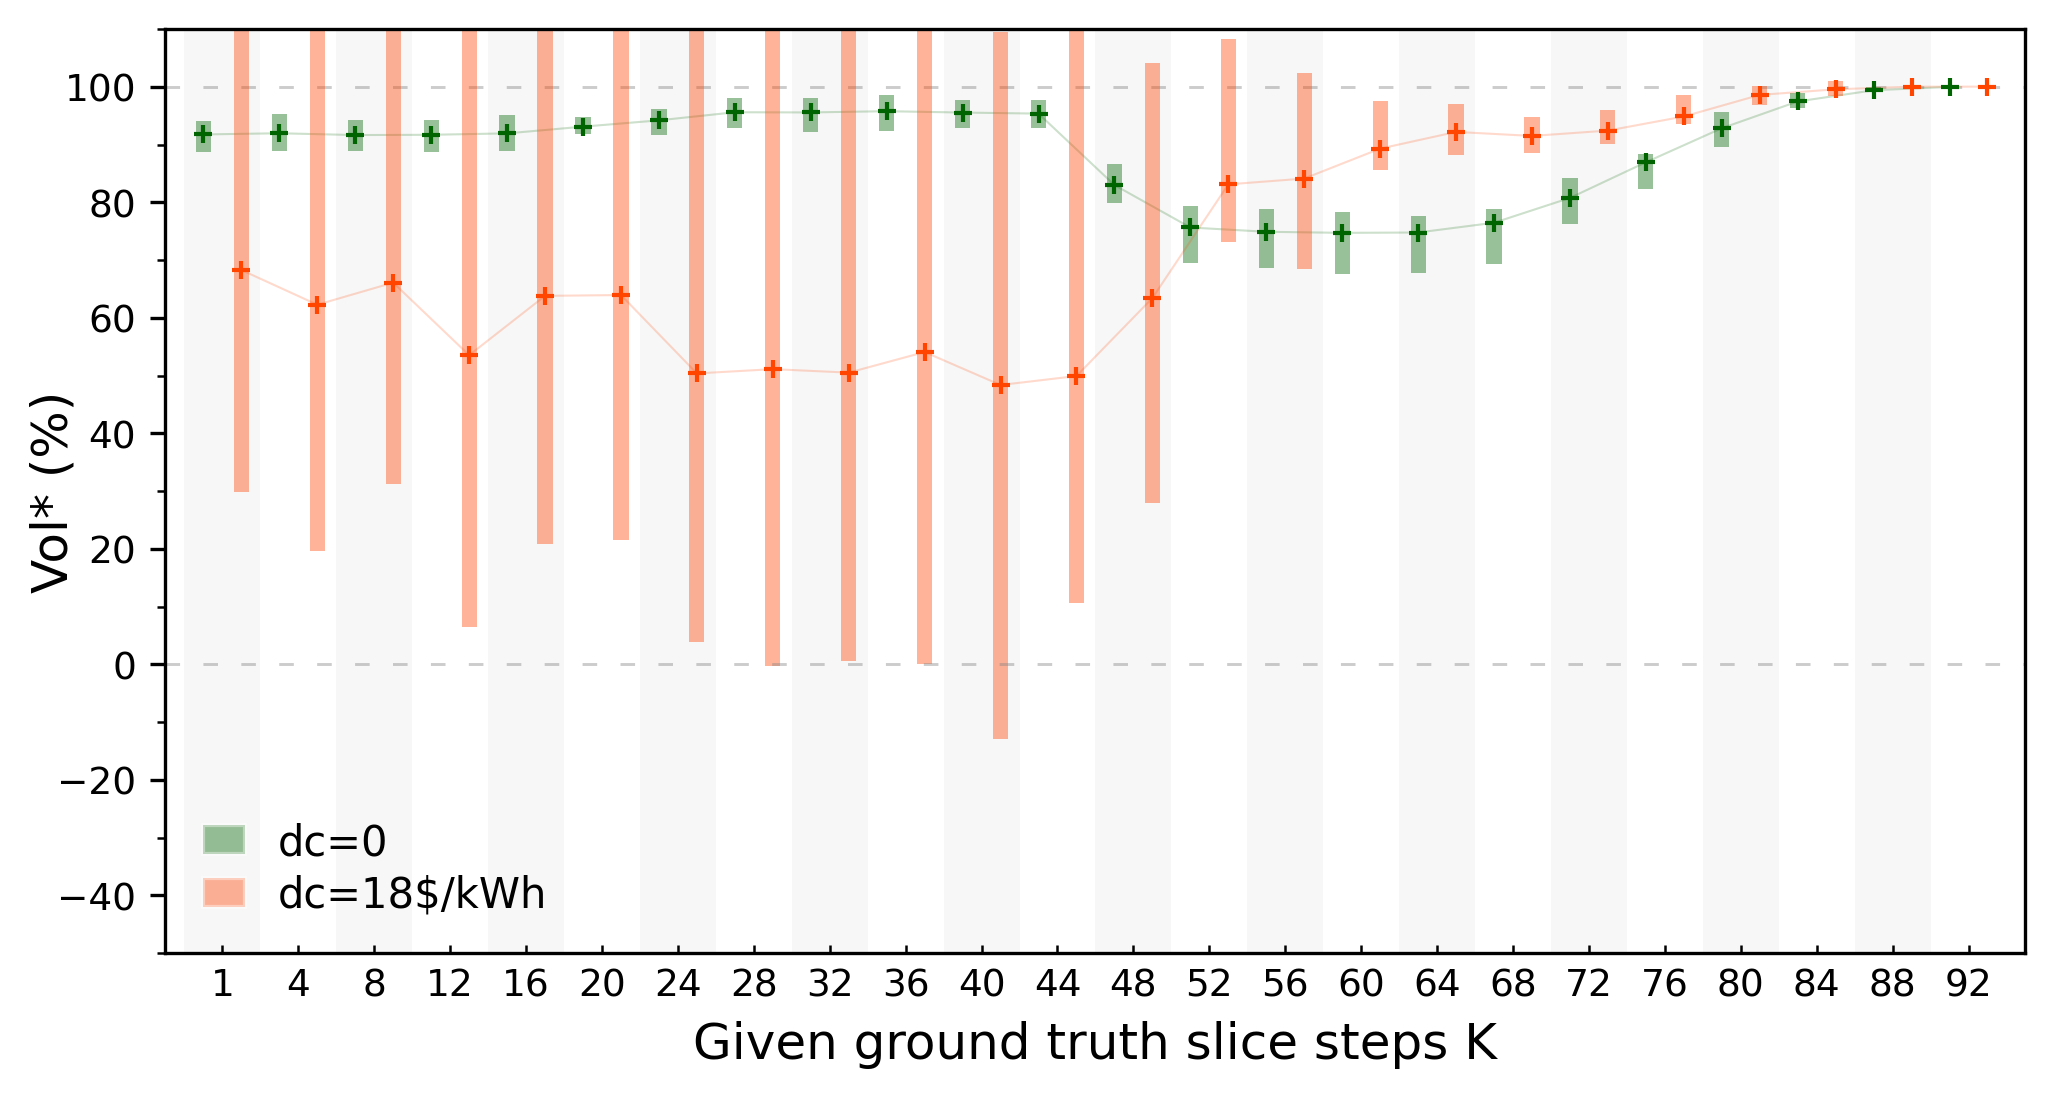

In [6]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK96\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK96\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(-50,110),
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,
    save_fn="timescale_VoI_exeK96.png"
)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_54720\1814656439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_54720\1814656439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_54720\1814656439.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

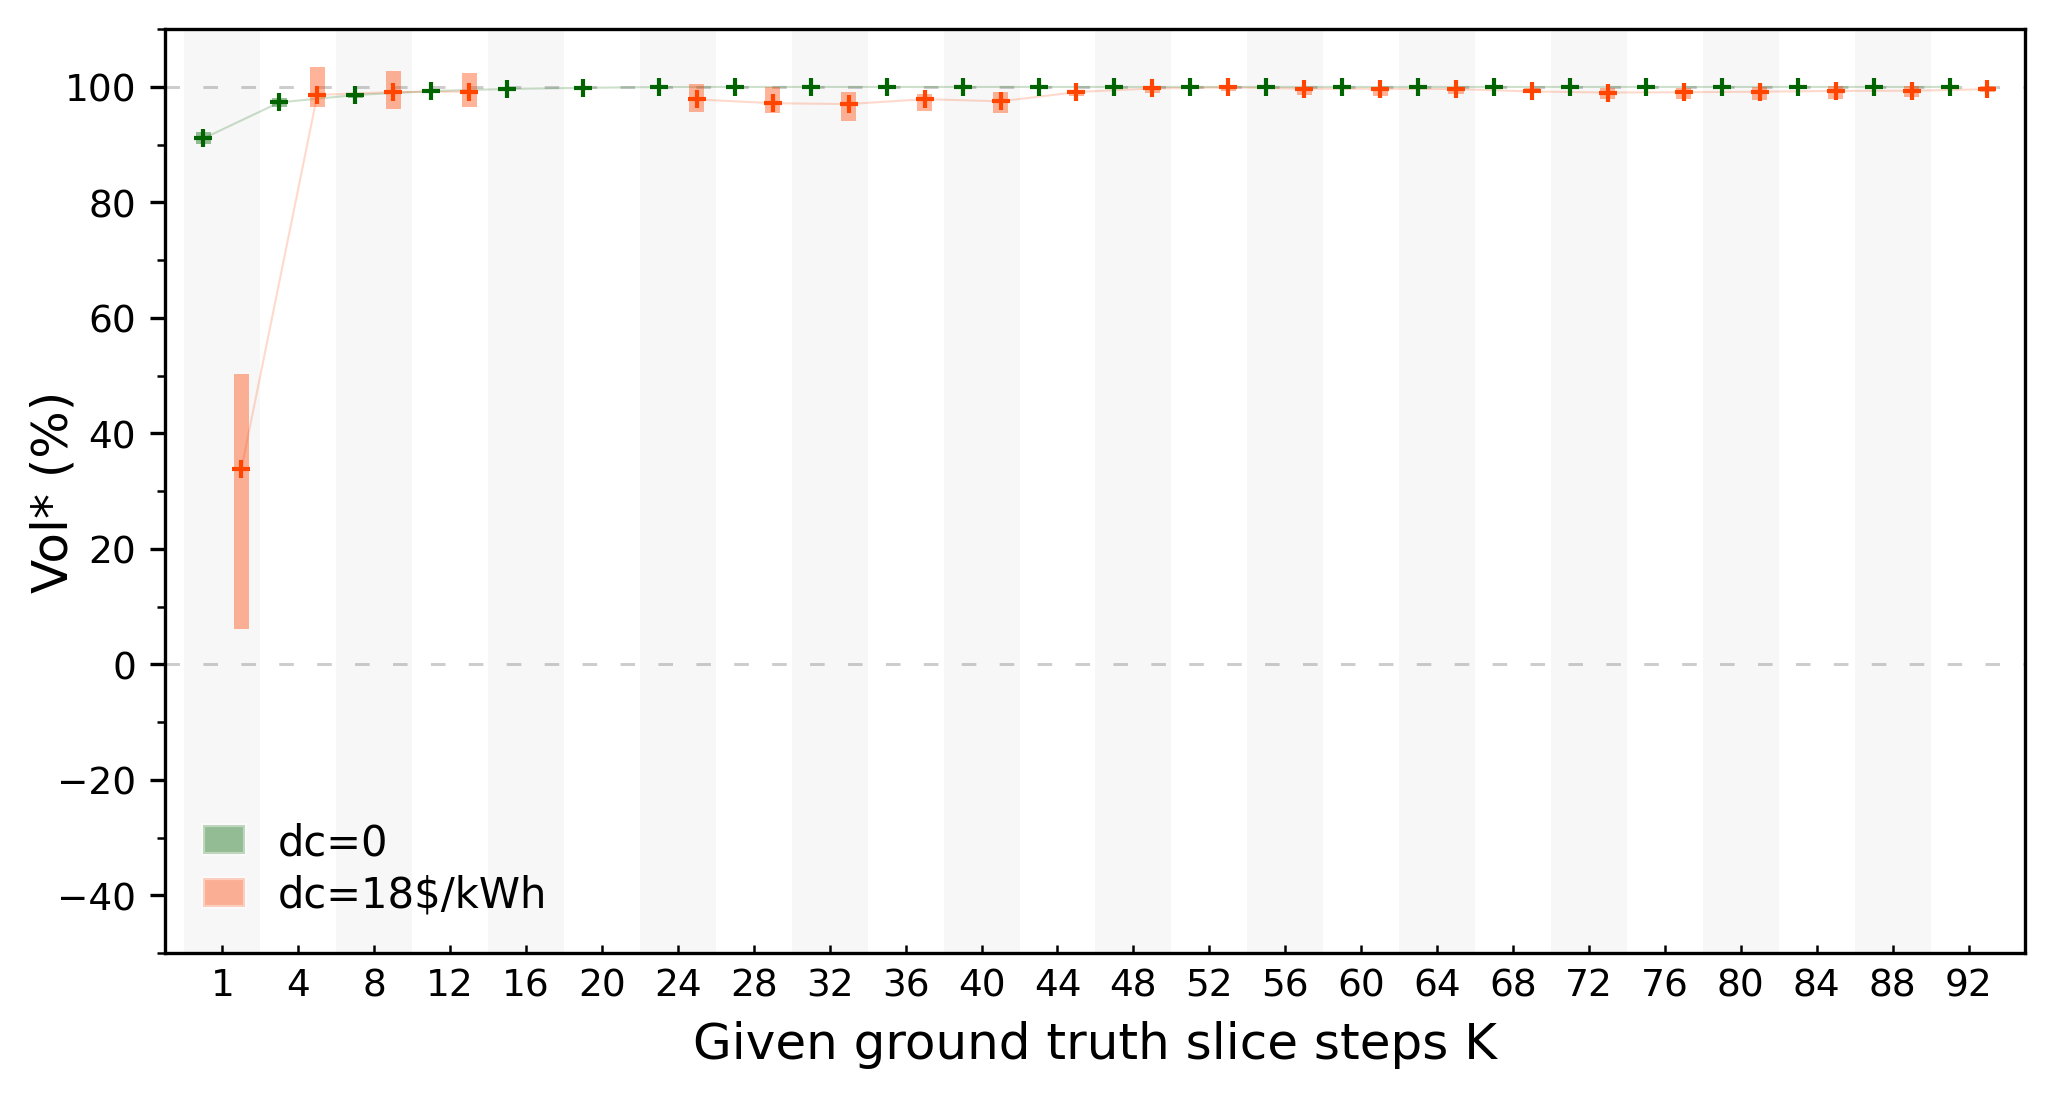

In [5]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK4\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK4\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(-50,110),
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,
    save_fn="timescale_VoI_exeK4.png"
)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_25868\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_25868\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_25868\1953959780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

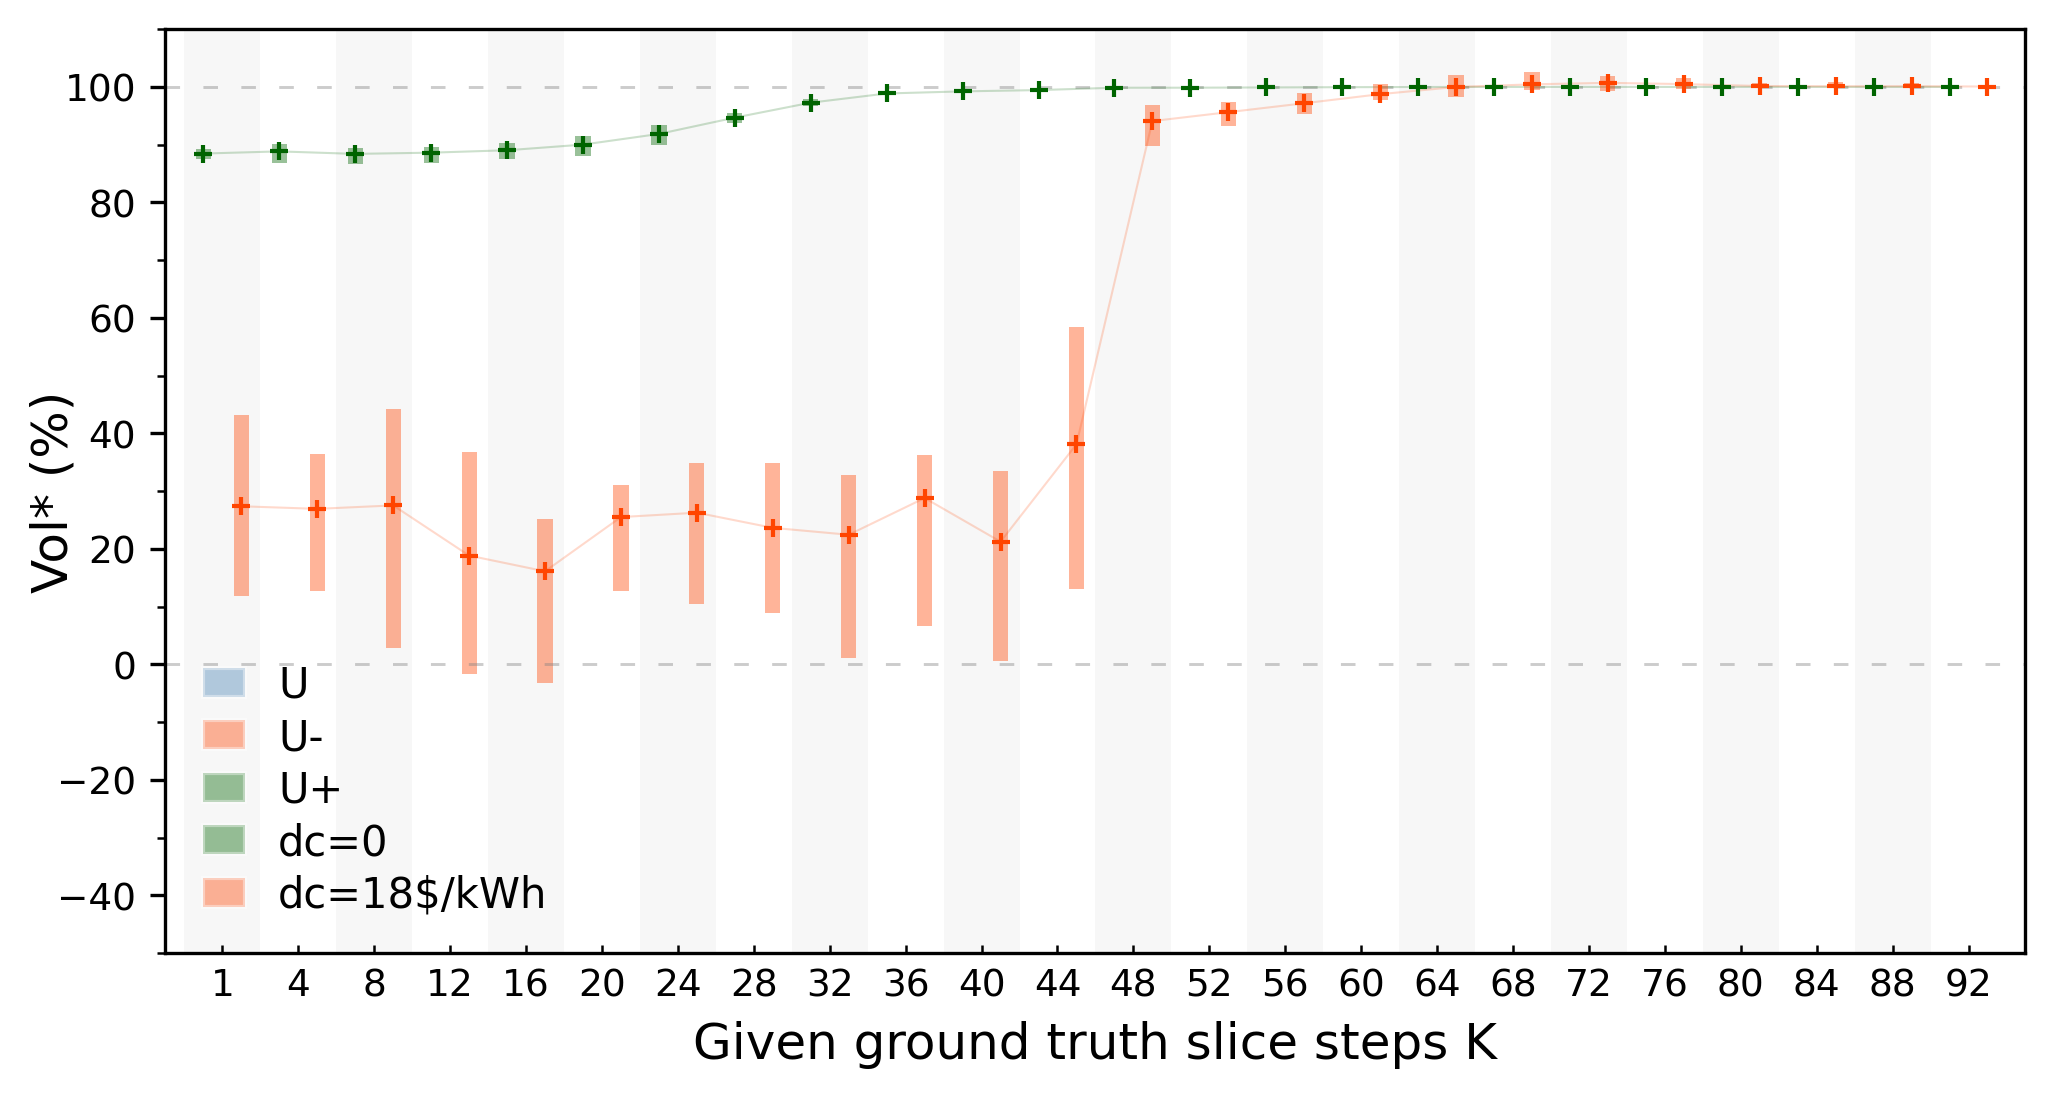

In [22]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK48\concatnate_search.xlsx'
exeK96_dc,pred_K,exeK96_dc_mean=get_df(fn,True)
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\concatnate_search\exeK48\concatnate_search_0dc.xlsx'
exeK96_0dc,pred_K,exeK96_0dc_mean=get_df(fn,True)
y_dic={
    'dc=0':exeK96_0dc,
    'dc=18$/kWh':exeK96_dc,
}
mean_dic={
    'dc=0':exeK96_0dc_mean,
    'dc=18$/kWh':exeK96_dc_mean,
}
pred_K=pred_K

cluster_box_plot(
    figsize=(8,4),plot_line_new=True,vol=True,ylimit=(-50,110),
    mape=pred_K,y_dic=y_dic,mean_dic=mean_dic,
    save_fn="timescale_VoI_exeK4.png"
)

# VoI under different pred models

In [23]:
y_dic

{'dc=0': [array([89.00596933, 86.65092896, 87.91997902, 85.17876963, 86.54898956,
         89.76883964, 88.76196943, 88.07922788, 88.68142596, 89.1676549 ,
         90.86350248, 90.91205659]),
  array([94.72279811, 86.64979548, 85.76320563, 85.28658854, 86.79095696,
         89.77489583, 88.85486635, 88.22772783, 88.92547826, 89.23138553,
         90.8777675 , 90.91999157]),
  array([89.00670614, 86.66470447, 85.8330411 , 85.17122726, 86.67134649,
         89.87103283, 89.04173545, 88.32782592, 88.99623439, 89.28825237,
         90.83552856, 91.10792903]),
  array([88.97054942, 86.79280367, 86.23289531, 85.5528392 , 86.92980534,
         90.08292459, 89.51424831, 88.65681519, 89.19381678, 89.38741038,
         90.8338532 , 91.2272271 ]),
  array([89.05579157, 86.81981673, 86.80844641, 86.32743704, 87.79140017,
         90.45458274, 90.29195433, 89.45245165, 89.61341718, 89.62234483,
         90.9109765 , 91.23090211]),
  array([89.51927637, 87.15126009, 87.34967654, 87.06278534, 88.283

In [15]:
fn=r'L:\Coding_project\Energy_grid_new\output\experiments\Multiple_model_compare\RF_NAIVE.xlsx'

In [4]:
df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
df_grouped=df.groupby(['month_of_year','ev_to_bld','price_dc'])
df_to_concat=[]
drop_base=True
for i in df_grouped.groups.keys():
    df=df_grouped.get_group(i)
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    if drop_base:
        df=df.drop(df[(df.pred_model=="GT")].index)
    df_to_concat.append(df)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_23748\3379308085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_23748\3379308085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
C:\Users\Lunlo\AppData\Local\Temp\ipykernel_23748\3379308085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [17]:
df=df.drop(df[(df.exe_K==1)].index)
df=df.drop(df[(df.ev_to_bld==0.25)].index)

In [18]:
RF_N_dc=list(df[df.price_dc==0.6]['relative_OPEX'])

In [10]:
method_dic=[
    "XGB",
    "LR_PCo",
    "TFT_optuna",
    "LR_NAIVE",
    "TFT_NAIVE",
    "DeepAR_optuna",
    #'RF_NAIVE',
   
]
y_dic={
    'dc=0':[],
    'dc=18$/kWh':[]
}
y_dic_mean={
    'dc=0':[],
    'dc=18$/kWh':[]
}
for name in method_dic:
    fn='L:/Coding_project/Energy_grid_new/output/experiments/Multiple_model_compare/'+name+'.xlsx'
    df=cal_relative_12mon(fn,drop_base,group_keys=['month_of_year','ev_to_bld','price_dc'])
    df=df.drop(df[(df.exe_K==1)].index)
    df=df.drop(df[(df.ev_to_bld==0)].index)
    values_dc=np.array(df[df.price_dc==0.6]['relative_OPEX'])
    values_0dc=np.array(df[df.price_dc==0]['relative_OPEX'])
    y_dic['dc=0'].append(values_0dc)
    y_dic['dc=18$/kWh'].append(values_dc)
    y_dic_mean['dc=0'].append(np.nanmean(values_0dc))
    y_dic_mean['dc=18$/kWh'].append(np.nanmean(values_dc))

    

l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

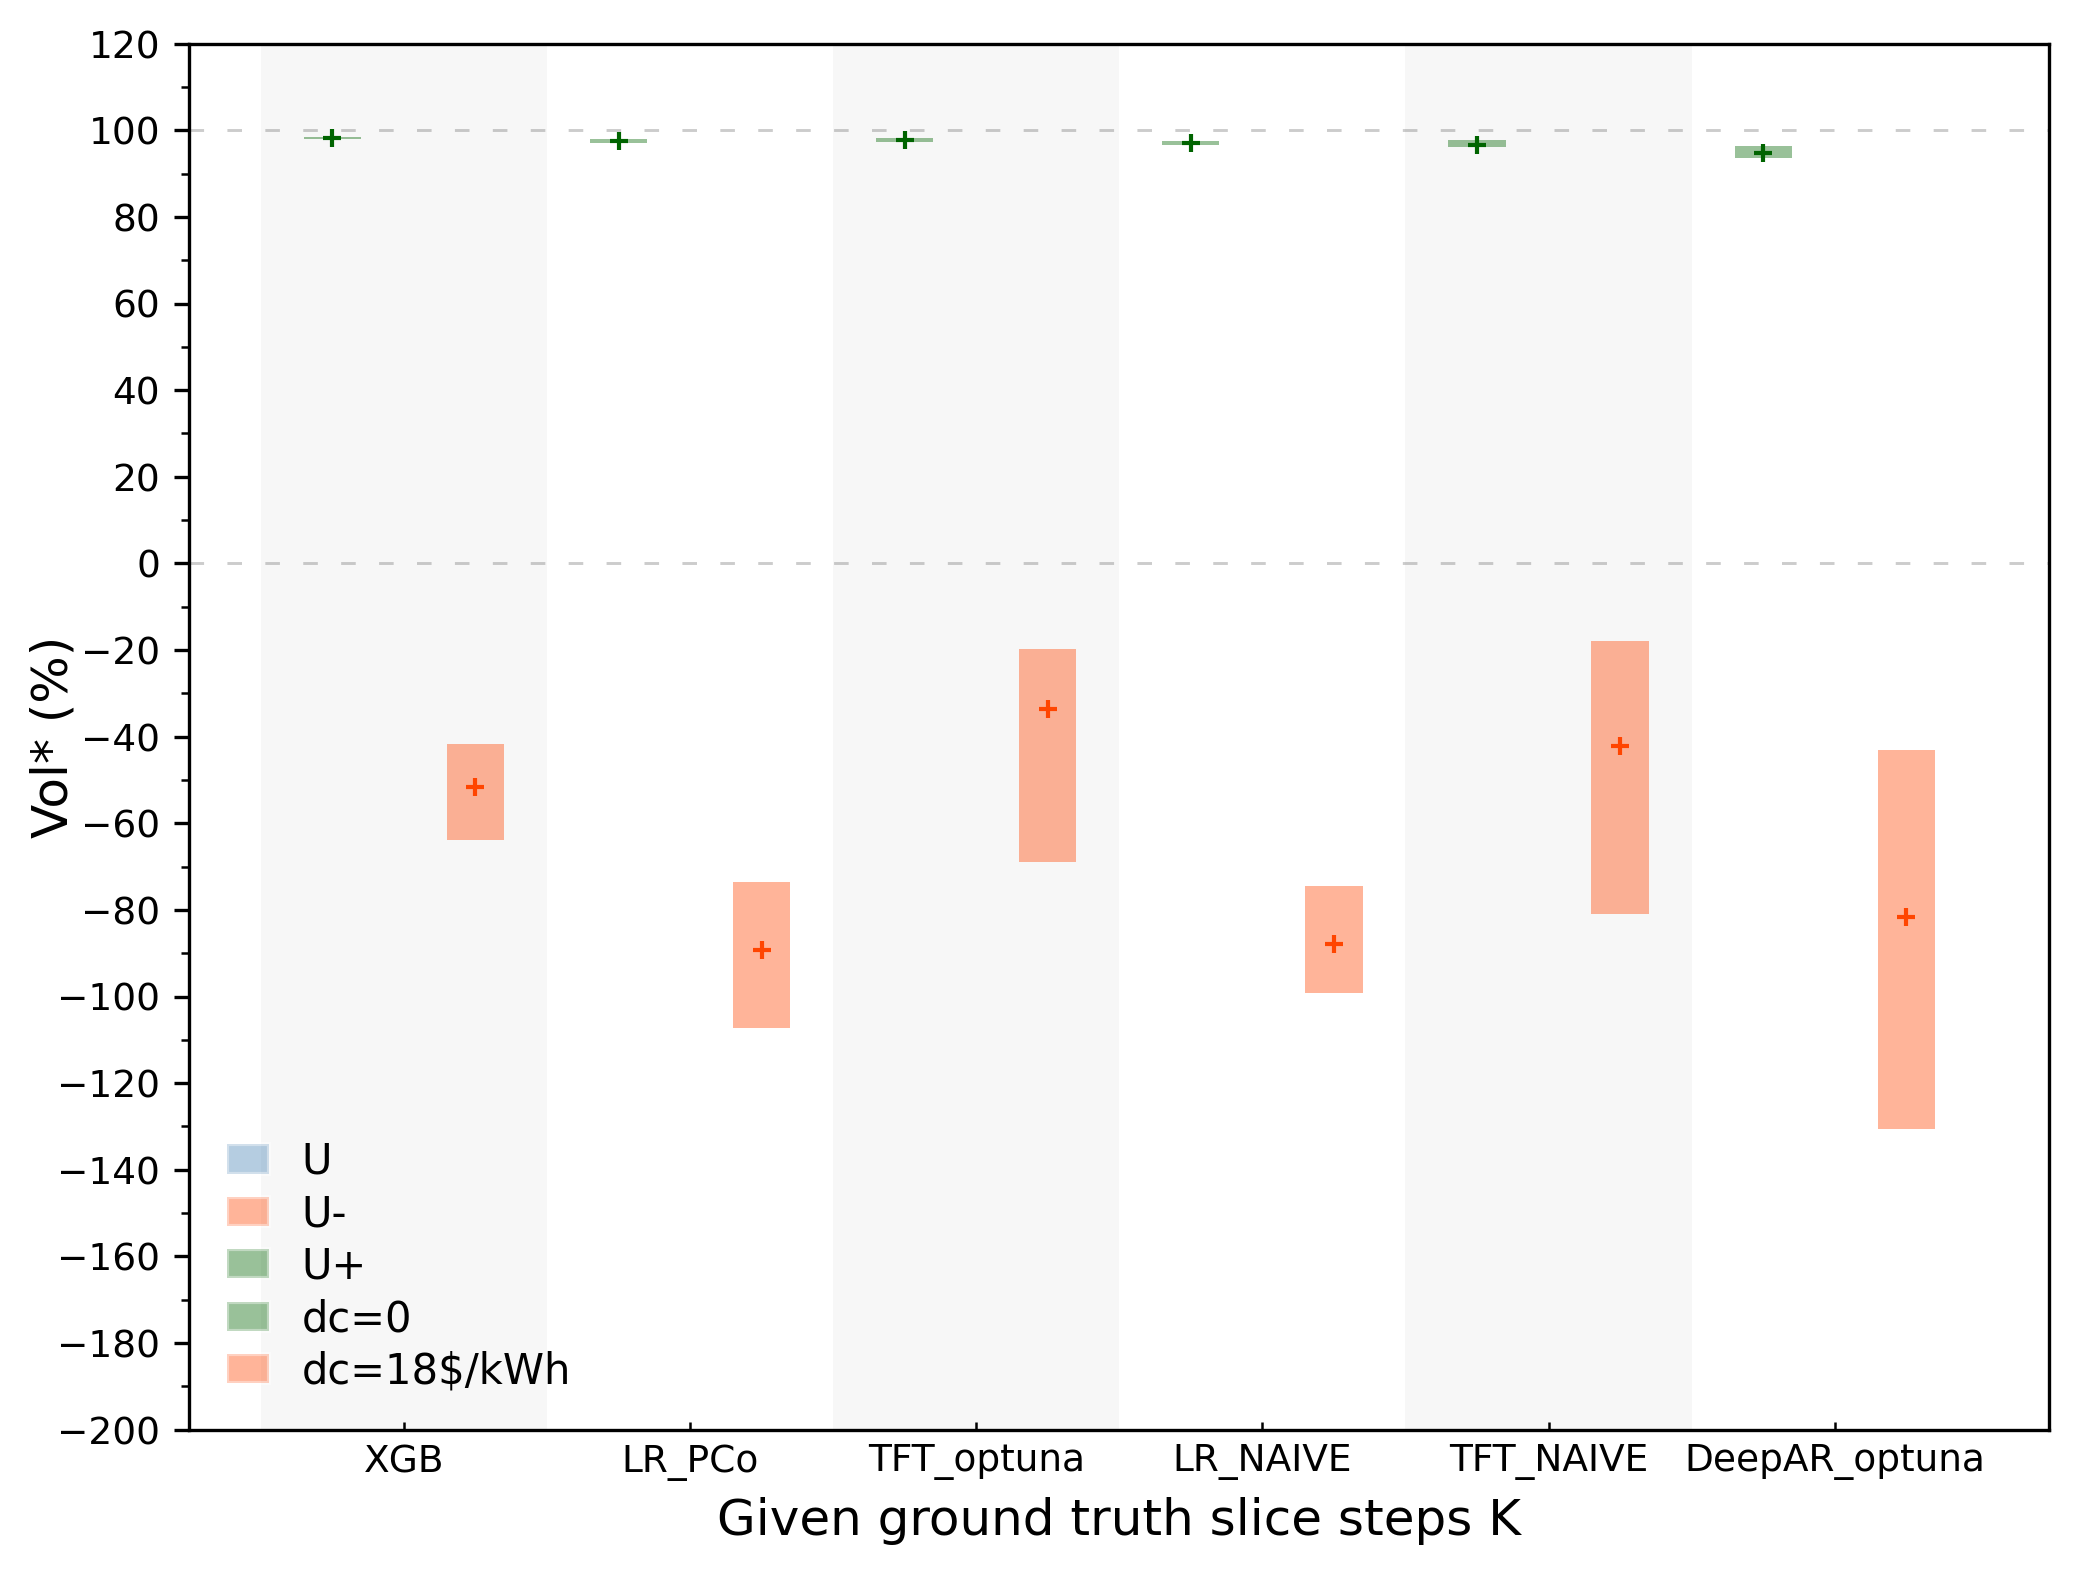

In [11]:
cluster_box_plot(
    figsize=(8,6),plot_line_new=False,vol=True,ylimit=(-200,120),
    mape=method_dic,y_dic=y_dic,mean_dic=y_dic_mean,
    save_fn="Multiple_models_VoI.png"
)

# VoI artificial noise with no EVs

In [7]:
mon_list=['Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Dec','Nov']#['May']#
#folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information\ununiform-hour'
folder_path=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information_journal'
fn_list=[]
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))
mape,y_dic_old,mean_dic_old= get_df_for_plot("by_execution",fn_list)
mape,y_dic,mean_dic= get_df_for_plot("minimize_cap",fn_list)
mape,y_dic_0,mean_dic_0= get_df_for_plot("zero",fn_list)

l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:255: RuntimeWarning: Mean of empty slice
  y_uniform_mean.append(np.nanmean(u))
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:256: RuntimeWarning: Mean of empty slice
  y_uniform_pos_mean.append(np.nanmean(p))
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:257: RuntimeWarning: Mean of empty slice
  y_uniform_neg_mean.append(np.nanmean(n))
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:255: RuntimeWarning: Mean of empty slice
  y_uniform_mean.append(np.nanmean(u))
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:256: RuntimeWarning: Mean of empty slice
  y_uniform_pos_mean.append(np.nanmean(p))
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:257: RuntimeWarning: Mean of empty slice
  y_uniform_neg_mean.append(np.nanmean(n))


In [6]:
y_dic_old

{'U': [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([ 6.77316069, 14.55816354, 13.60887069,  5.64666456, 21.26034449,
         25.88159152, 32.0402618 , 10.42923176, 10.4636654 ,  4.89689175]),
  array([ 30.53573198,  63.11995637,  76.86223619,  87.31864979,
          87.17114858, 128.68302586, 120.34534035,  47.96611207,
          41.17828075,  31.73882392]),
  array([ 62.2401394 , 114.70261558, 131.83951466, 156.07975157,
         141.26229363, 223.58860417, 215.32340884,  80.58553895,
          66.84514214,  59.74115019]),
  array([118.66055366, 175.09801845, 197.75329434, 268.25324068,
         207.09789461, 355.88777084, 309.26868216, 104.69065865,
          79.29488097,  69.23196037]),
  array([         nan, 196.4136635 , 231.05747327, 276.10193768,
         212.29203774, 460.07569299, 394.2732204 , 106.56434854,
         114.06418663,  72.22899525]),
  array([135.31655969, 205.5001975 , 233.6452604 , 308.21605132,
         222.23405642, 513.15568652, 432.17264053, 14

<Axes: xlabel='Given ground truth slice steps K', ylabel='Vol* (%)'>

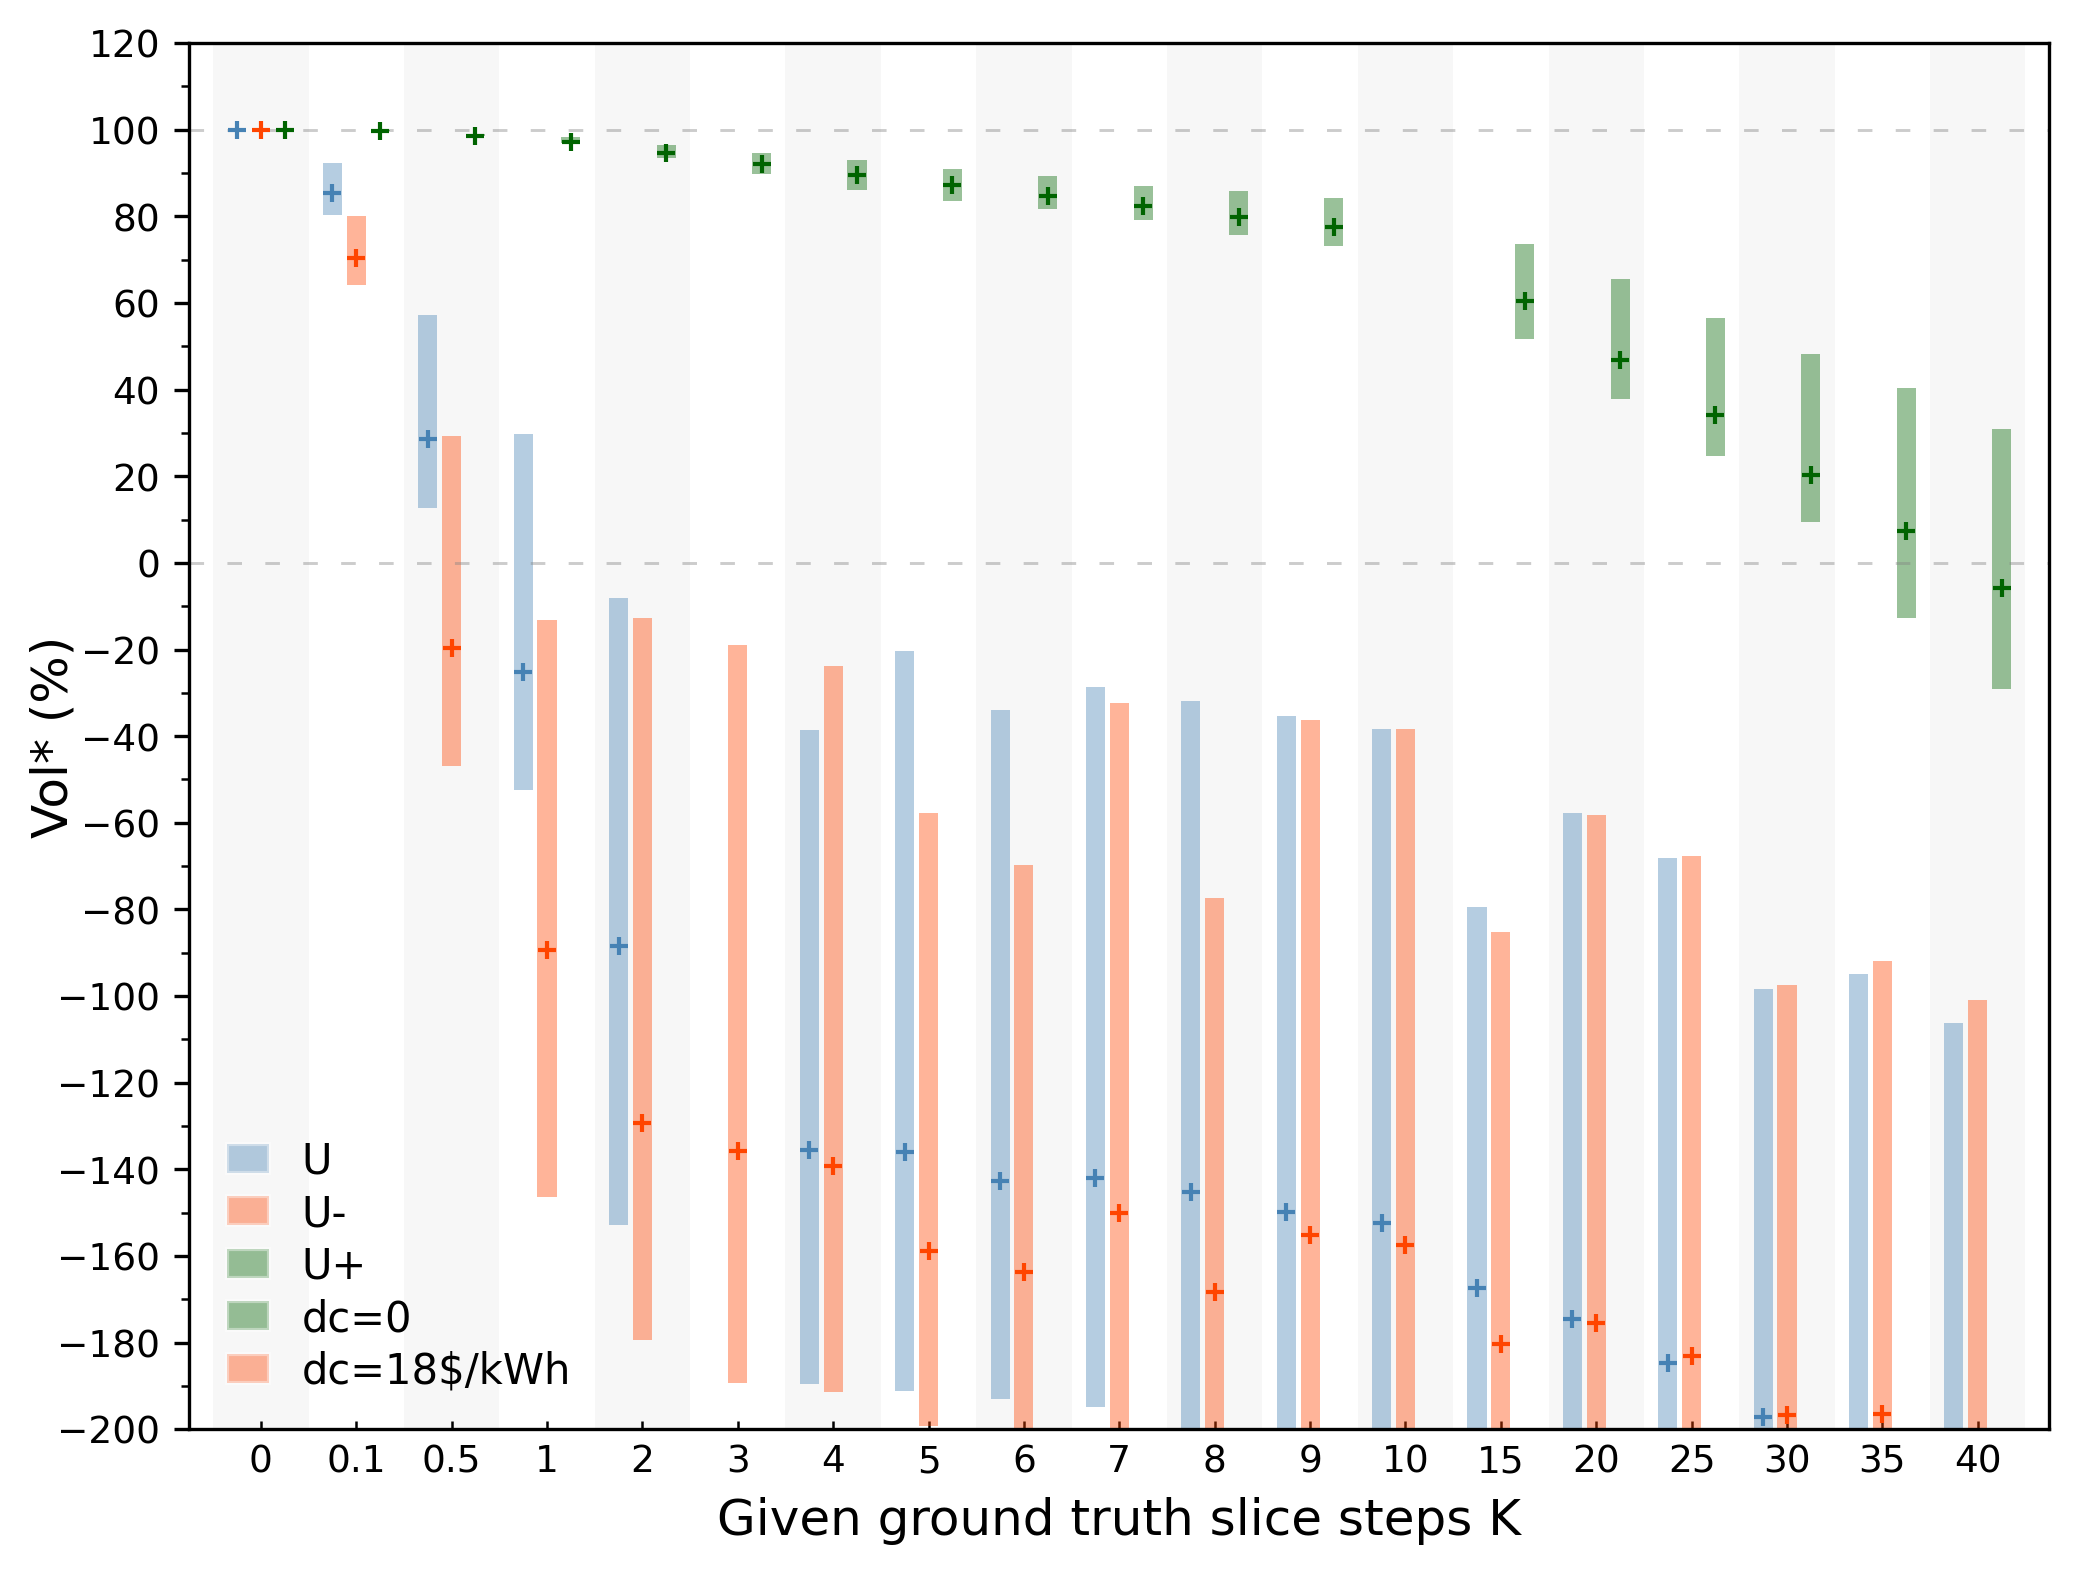

In [8]:
cluster_box_plot(
    figsize=(8,6),plot_line_new=False,vol=True,ylimit=[-200,120],
    mape=mape,y_dic=y_dic_old,mean_dic=mean_dic_old,
    save_fn="fig3-value-of-info-track-real-no-ev-no-Sep.png"
)

In [ ]:
method_dic=[
    "XGB",
    "LR_PCo",
    "TFT_optuna",
    "LR_NAIVE",
    "TFT_NAIVE",
    "DeepAR_optuna",
    #'RF_NAIVE',
   
]
y_dic={
    'dc=0':[],
    'dc=18$/kWh':[]
}
y_dic_mean={
    'dc=0':[],
    'dc=18$/kWh':[]
}
for name in method_dic:
    fn='L:/Coding_project/Energy_grid_new/output/experiments/Multiple_model_compare/'+name+'.xlsx'
    df=cal_relative_12mon(fn,drop_base,group_keys=['month_of_year','ev_to_bld','price_dc'])
    df=df.drop(df[(df.exe_K==1)].index)
    df=df.drop(df[(df.ev_to_bld==0)].index)
    values_dc=np.array(df[df.price_dc==0.6]['relative_OPEX'])
    values_0dc=np.array(df[df.price_dc==0]['relative_OPEX'])
    y_dic['dc=0'].append(values_0dc)
    y_dic['dc=18$/kWh'].append(values_dc)
    y_dic_mean['dc=0'].append(np.nanmean(values_0dc))
    y_dic_mean['dc=18$/kWh'].append(np.nanmean(values_dc))

# plot in real dimension

In [2]:
mon_list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Dec','Nov']#['May']#
#folder_path=r'D:\Codes\Energy_grid_new\output\experiments\thesis_value_of_information\ununiform-hour'
folder_path=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_value_of_information_journal'
fn_list=[]
method='by_execution'
for i in mon_list:
    fn="6h-bat-"+i+"-disturbance-type.xlsx"
    fn_list.append(os.path.join(folder_path,fn))
def get_df_for_plot(method,fn_list):
    dfs=[]
    necessaey_cols=["method","strategy","B_kWh","pred_model",
                    "month_of_year","p_grid_max","price_dc",
                    "disturbance_rule","disturbance_MAPE","p_grid_max_method",
                    "OPEX","tou_cost","demand_charge","relative_OPEX"]
    for fn in fn_list:
        df=pd.DataFrame(cal_relative(fn),columns=necessaey_cols)
        dfs.append(df)
        
    for i in range(len(dfs)):
        df=dfs[i]
        rule_list=df["disturbance_rule"].unique()
        rule_list=rule_list[pd.notnull(rule_list)]
        for rule in rule_list:
            a=df[(df.disturbance_rule==rule)&(df.disturbance_MAPE==0.1)].copy()
            for k in ["OPEX","tou_cost","demand_charge","relative_OPEX"]:
                a[k]=[df[(df.strategy=="optimal")&(df.pred_model=="GT")][k].values[0]]*len(a)
            a["disturbance_MAPE"]=[0]*len(a)
            df=df._append(a).copy()
        dfs[i]=df.copy()
        
    df_concated=pd.concat(dfs).drop_duplicates().reset_index(drop=True)
    df_concated["disturbance_MAPE"] = df_concated["disturbance_MAPE"].apply(lambda x: round(x, 1))
    df_by_method=df_concated.groupby(by='p_grid_max_method')

    df_by_exe=df_by_method.get_group(method).groupby(by="disturbance_rule")
    df_uniform=df_by_exe.get_group("uniform")
    df_uniform_neg=df_by_exe.get_group("uniform_neg")
    df_uniform_pos=df_by_exe.get_group("uniform_pos")

    mape=sorted(df_uniform["disturbance_MAPE"].unique())
    y_uniform=list()
    y_uniform_neg=list()
    y_uniform_pos=list()
    y_uniform_mean=list()
    y_uniform_neg_mean=list()
    y_uniform_pos_mean=list()
    y_dic_all={}
    for m in mape:
        p=np.array(df_uniform_pos[df_uniform_pos.disturbance_MAPE==m]["relative_OPEX"].values)
        u=np.array(df_uniform[df_uniform.disturbance_MAPE==m]["relative_OPEX"].values)
        n=np.array(df_uniform_neg[df_uniform_neg.disturbance_MAPE==m]["relative_OPEX"].values)
        
        if m in y_dic_all.keys():
            ...
        else:
            if m==0:
                y_dic_all.update({m:[list(),0.5,1,1.5]})
            elif m==0.1:
                y_dic_all.update({m:[list(),1.5,2,2.5]})
            elif m==0.5:
                y_dic_all.update({m:[list(),2.5,3,3.5]})
            else:
                y_dic_all.update({m:[list(),m-0.5+3,m+3,m+0.5+3]})
        y_dic_all[m][0].append([m,0.1,'U+',p, np.nanmean(p)])
        y_dic_all[m][0].append([m,0.1,'U',u, np.nanmean(u)])
        y_dic_all[m][0].append([m,0.1,'U-',n, np.nanmean(n)])
        
            
        y_uniform.append(u)
        y_uniform_pos.append(p)
        y_uniform_neg.append(n)
        y_uniform_mean.append(np.nanmean(u))
        y_uniform_pos_mean.append(np.nanmean(p))
        y_uniform_neg_mean.append(np.nanmean(n))
    y_dic={
        'U':y_uniform,
        'U-':y_uniform_neg,
        'U+':y_uniform_pos
    }
    mean_dic={
        'U':y_uniform_mean,
        'U-':y_uniform_neg_mean,
        'U+':y_uniform_pos_mean
    }
    return mape,y_dic,mean_dic,y_dic,y_dic_all

def recal_position(dic,inter_group_r=0.9,inter_bar_r=0.7,base=1):
    key_list=np.array(list(dic.keys()))
    for k in range(len(key_list)):

        key=key_list[k]

        N=len(dic[key][0])
        start=dic[key][1]

        inner_gap=(base*inter_group_r)/(N+1)
        outter_gap=inner_gap+base*(1-inter_group_r)/2
        width=inner_gap*inter_bar_r
        
        for i in range(N):
            if i==0:
                dic[key][0][i][0]=start+outter_gap
            else:
                dic[key][0][i][0]=start+outter_gap+inner_gap*i
            dic[key][0][i][1]=width
    return dic


In [3]:
method_dic=[
    "XGB",
    "LR_PCo",
    "TFT_optuna",
    "LR_NAIVE",
    #"TFT_NAIVE",
    "DeepAR_optuna",
    "Heuristic",
    #'RF_NAIVE',
   
]
y_dic_pred={
    'dc=0':[],
    'dc=18$/kWh':[]
}
y_dic_pred_mean={
    'dc=0':[],
    'dc=18$/kWh':[]
}
drop_base=True
for name in method_dic:
    fn='L:/Coding_project/Energy_grid_new/output/experiments/Multiple_model_compare/'+name+'.xlsx'
    df=cal_relative_12mon(fn,drop_base,group_keys=['month_of_year','ev_to_bld','price_dc'])
    df=df.drop(df[(df.exe_K==1)].index)
    df=df.drop(df[(df.ev_to_bld==0)].index)
    values_dc=np.array(df[df.price_dc==0.6]['relative_OPEX'])
    values_0dc=np.array(df[df.price_dc==0]['relative_OPEX'])
    y_dic_pred['dc=0'].append(values_0dc)
    y_dic_pred['dc=18$/kWh'].append(values_dc)
    y_dic_pred_mean['dc=0'].append(np.nanmean(values_0dc))
    y_dic_pred_mean['dc=18$/kWh'].append(np.nanmean(values_dc))

l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
l:\Coding_project\Energy_grid_new\paper_working\plot_helper.py:1202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [4]:
mape,y_dic,mean_dic,y_dic,y_dic_all=get_df_for_plot(method,fn_list)

In [12]:
y_dic_all

{0.0: [[[0.775,
    0.1575,
    'U+',
    array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
           100.]),
    0.0],
   [1.0,
    0.1575,
    'U',
    array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
           100.]),
    0.0],
   [1.225,
    0.1575,
    'U-',
    array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
           100.]),
    0.0]],
  0.5,
  1,
  1.5],
 0.1: [[[1.775,
    0.1575,
    'U+',
    array([99.95164651, 99.77558327, 99.96169593, 99.73196817, 98.86291707,
           99.69769221, 99.89511116, 99.6839138 , 99.41394536, 99.82190641,
           99.84499094, 99.7768279 ]),
    0.2984834381075429],
   [2.0,
    0.1575,
    'U',
    array([91.20712447, 93.22683931, 85.44183646, 86.39112931, 94.35333544,
           78.73965551, 74.11840848, 67.9597382 , 94.55529089, 89.57076824,
           89.5363346 , 95.10310825]),
    13.316369236079906],
   [2.225,
    0.1575,
    'U-',
    array([84.22912983, 88.

In [6]:
y_dic_all[4][0].append([0,0,'XGBoost',y_dic_pred['dc=18$/kWh'][0],np.nanmean(y_dic_pred['dc=18$/kWh'][0])])
y_dic_all[5][0].append([0,0,'LR-PCo',y_dic_pred['dc=18$/kWh'][1],np.nanmean(y_dic_pred['dc=18$/kWh'][1])])
y_dic_all[5][0].append([0,0,'TFT',y_dic_pred['dc=18$/kWh'][2],np.nanmean(y_dic_pred['dc=18$/kWh'][2])])
y_dic_all[6][0].append([0,0,'LR',y_dic_pred['dc=18$/kWh'][3],np.nanmean(y_dic_pred['dc=18$/kWh'][3])])
y_dic_all[10][0].append([0,0,'DeepAR',y_dic_pred['dc=18$/kWh'][4],np.nanmean(y_dic_pred['dc=18$/kWh'][4])])
y_dic_all[7][0].append([0,0,'Heuristic',y_dic_pred['dc=18$/kWh'][5],np.nanmean(y_dic_pred['dc=18$/kWh'][5])])


In [7]:
y_dic_all[5][0]

[[5.0,
  0.1,
  'U+',
  array([ 4.68060628, 10.66624465, 13.14723682, 20.27740398, 16.72927096,
         15.2376031 , 10.29931872, 18.29272252, 27.55399888,  7.98274063,
          8.72092596,  6.73216802]),
  13.360020043789254],
 [5.0,
  0.1,
  'U',
  array([118.14820947, 149.23036696, 206.52065586, 234.94862717,
         309.86565001, 224.25340773, 527.29655339, 433.83588424,
         298.55693095, 110.60283435,  85.78367874,  77.29095092]),
  231.36114581527758],
 [5.0,
  0.1,
  'U-',
  array([131.55105095, 178.05328536, 237.81321482, 251.09179803,
         315.19578526, 231.49425463, 527.00686992, 434.3501274 ,
         469.00246432, 150.90510157, 144.61648811, 117.90369721]),
  265.74867813167623],
 [0,
  0,
  'LR-PCo',
  array([218.49537559, 204.96620155, 205.52049556, 173.80861366,
         172.75548613,  99.68521359, 184.43752088, 212.80010302,
         202.2954138 , 225.33002711, 199.40220642, 171.96771342]),
  189.28869756158971],
 [0,
  0,
  'TFT',
  array([166.11187499, 169

In [8]:

y_dic_all_recal=recal_position(y_dic_all)

In [9]:
type(y_dic_all_recal)

dict

In [10]:
for key in [15,20,25,30,35,40]:
    y_dic_all_recal.pop(key)

<Axes: xlabel='MAPE (%)', ylabel='Vol* (%)'>

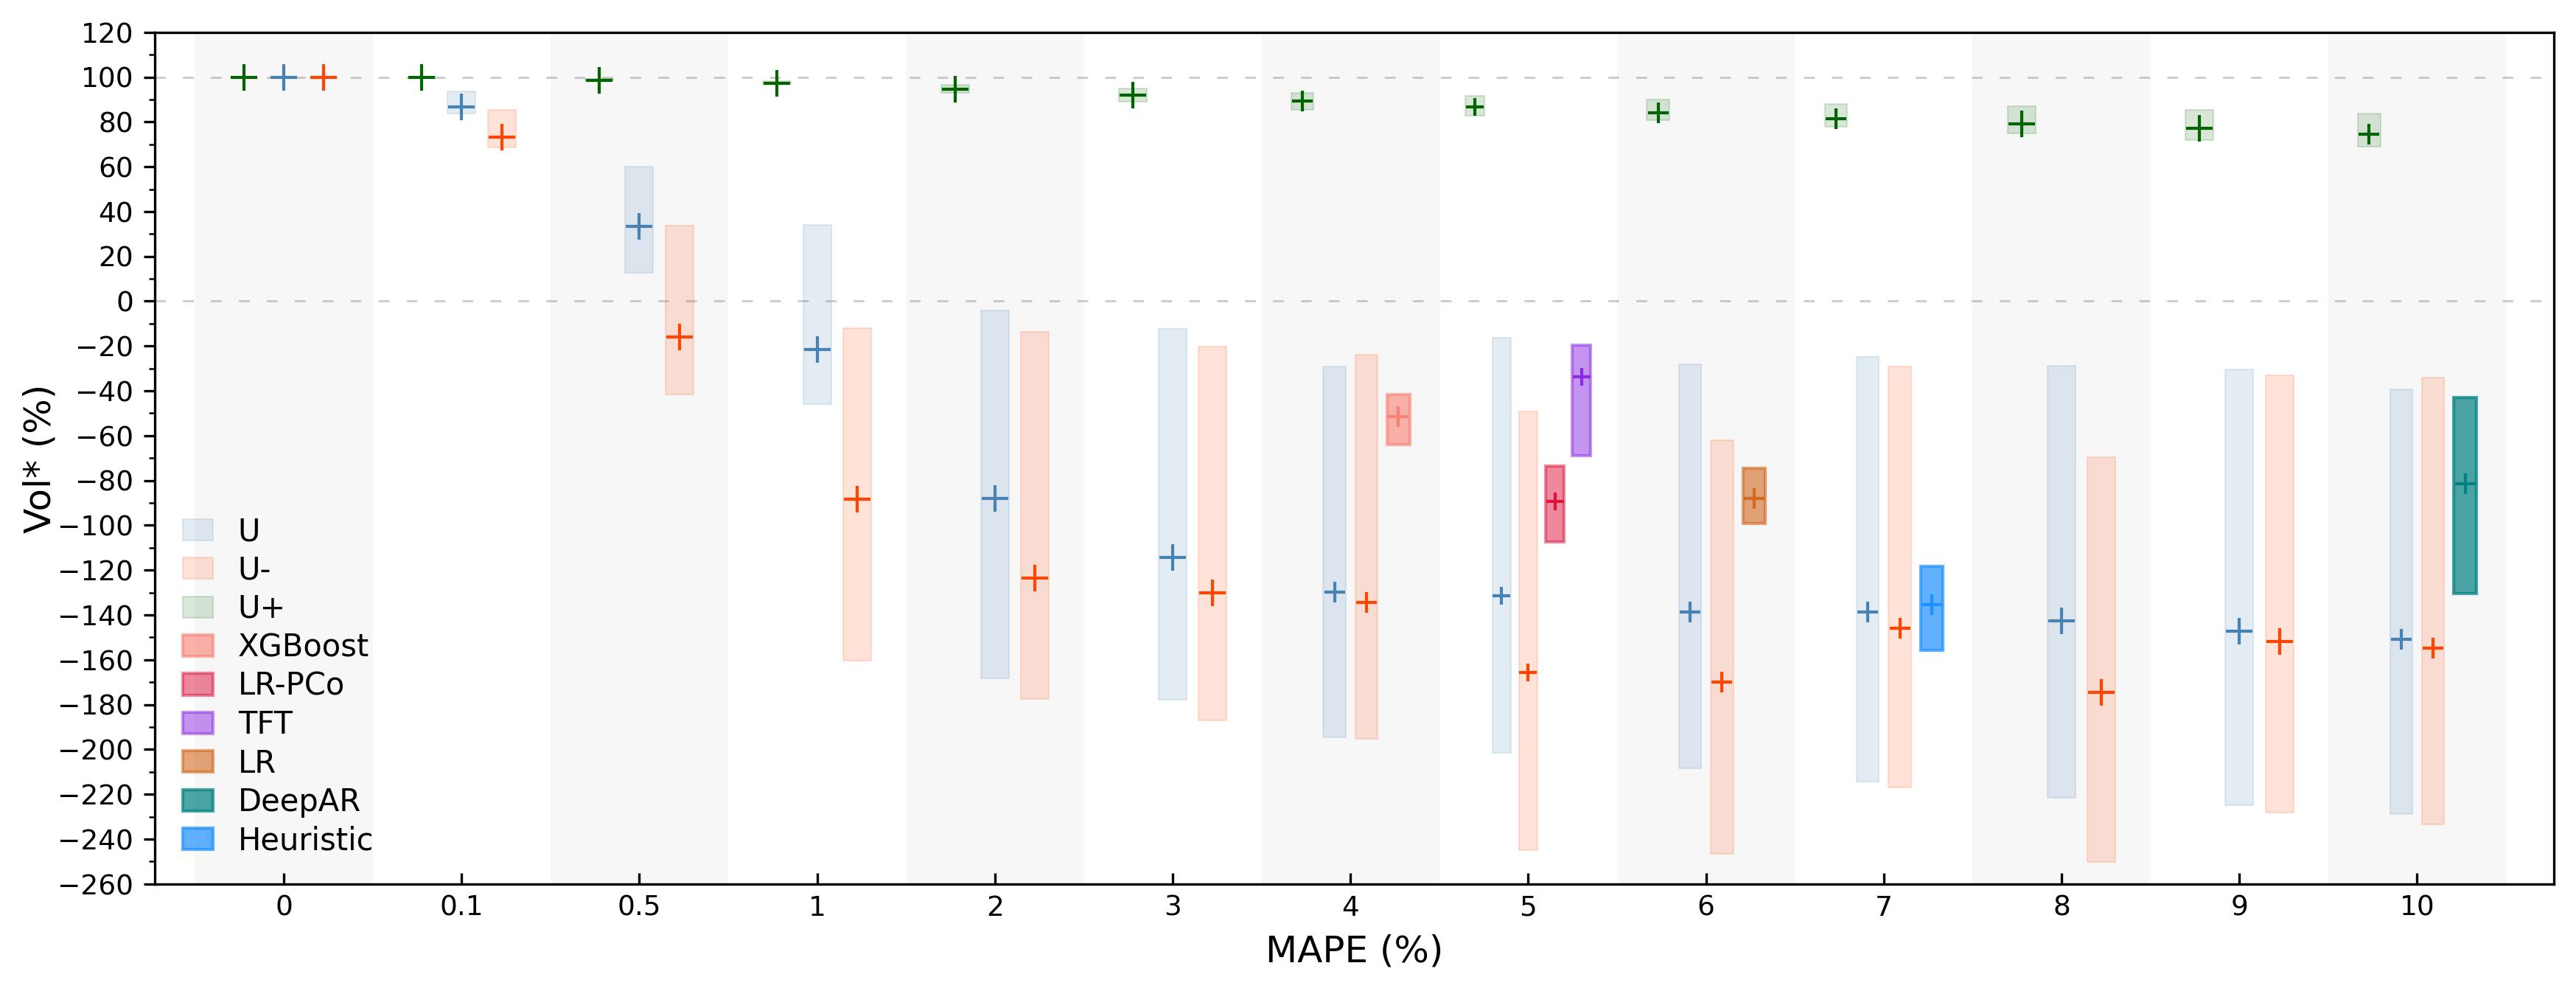

In [11]:
cluster_box_plot(
    figsize=(14,5),plot_line_new=False,vol=True,ylimit=[-260,120],
    mape=mape,y_dic=y_dic,mean_dic=mean_dic,y_dic_self_define=y_dic_all_recal,self_define_position=True,
    save_fn="fig-7-VoI-artificial-noise-and-sota-models.png",x_label='MAPE (%)'
)